## подготовка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
churn_data = pd.read_csv("data/churn.csv")

In [2]:
churn_df = churn_data.copy()
churn_df["Exited"] = churn_df["Exited"].astype("bool")
churn_df.drop("RowNumber", axis=1, inplace=True)
display(churn_df.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,True
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,True
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,False
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False


## задание 1
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

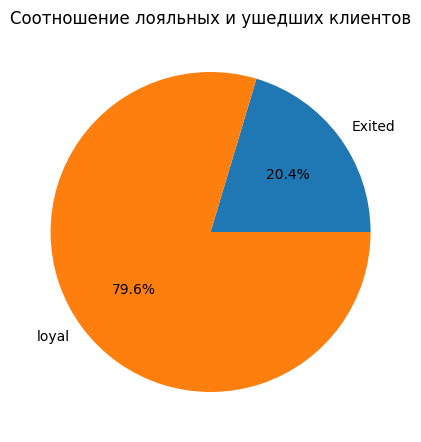

In [3]:
pie_data = churn_df.Exited.value_counts()
fig = plt.figure(figsize=(4, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    pie_data.iloc[::-1],
    labels=["Exited", "loyal"],
    autopct='%.1f%%',
);
axes.set_title("Соотношение лояльных и ушедших клиентов");


### коментарий
По графику видно, что количество ушедших клиентов составляет пятую часть всех клиентов и примерно в 4 раза меньше количества оставшихся 

По текущим данным пока можно сделать единственный вывод, что банку не грозит скорое разорение ввиду отстуствия клиентов


## задание 2
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

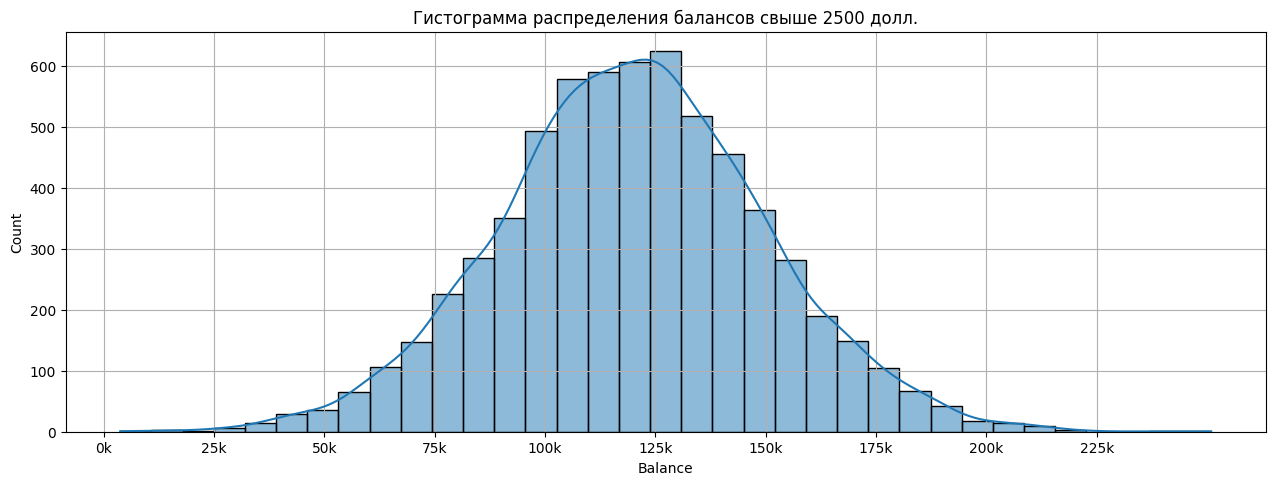

In [4]:
hist_data = churn_df[churn_df.Balance>2500]
fig = plt.figure( figsize=(12, 4))
axes = fig.add_axes([0, 0, 1, 1])
sns.histplot(
    data=hist_data,
    x='Balance',
    bins=35,
    kde=True,
    ax=axes
);
axes.set_title('Гистограмма распределения балансов свыше 2500 долл.');
axes.grid()
axes.set_xticks(range(0,250000, 25000));
axes.set_xticklabels(str(round(i/1000))+ "k" for  i in range(0,250000, 25000));

In [5]:
hist_data.Balance.describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64

### коментарий
Распределение баланса пользователей сильно напоминает нормальное распределение. Оно почти симетрично относительно центра (120 тысяч долл.)


## задание 3
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [6]:
fig = px.histogram(hist_data, x="Balance", color="Exited", marginal="box", 
                   nbins=35, category_orders= {"Exited": [1,0]}, template='seaborn')
fig.update_layout(title={
        'text': "Распределение балансов свыше 2.5к долл."}, legend_traceorder = "reversed",
        xaxis = dict(
        tickmode = 'array',
        tickvals = [i  for  i in range(0,250000, 25000)],
        ticktext = [str(round(i/1000))+ "k" for  i in range(0,250000, 25000)]
    ))
fig.show()
fig.write_html("plotly/histogram_3.html")

### коментарий 
графики распределений похожи по типу распределения и центру,
но у графика ушедших меньше размах, что может говорить о том, что люди со средним уровнем баланса (от 51к до 190к) более склонны к уходу нежели не входящие в эту группу. Возможно эта группа недовольна условиями, либо сервисом, который предостовляет банк, ориентируясь на их достаток (те очивидно, что сервис и комиссия для человека со счетом в 2500 долл. будет отличаться от сервиса для счета в 250к, как и для указанной ранее группы)


## задание 4
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [7]:
fig = px.histogram(churn_df, x="Age", color="Exited", 
                   marginal="box", nbins=35, template='seaborn')
fig.update_layout(title={
        'text': "Распределение возрастов"}, legend_traceorder = "reversed" )
fig.show()
fig.write_html("plotly/histogram_4.html")

### коментарий 
Банку стоит обратить внимание на возрастную группу 38 - 51 год: в этой группе отток клиентов максимален. 
Больше всего потенциальных выбросов в группе от 71 года (вря ли пожелые люди будут активно менять банк )


## Задание 5
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это. 

In [8]:
fig = px.scatter(churn_df, x="EstimatedSalary", y="CreditScore", 
                 category_orders={"Exited": [1,0] }, color="Exited", template='seaborn')
fig.update_layout(title={
        'text': "Взаимосвязь рейтинга и зарплаты"})
fig.show()
fig.write_html("plotly/scatter_5.html")

### коментарий
Связи никакой по этому графику между признаками нет

## задание 6
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это

In [9]:
pie_data = churn_df.groupby(by="Gender", as_index=False)["Exited"].value_counts()
pie_data["Exited"] = pie_data["Exited"].apply(lambda x: "Exited" if x else "loyal")
fig = px.sunburst(pie_data.iloc[::-1], values="count", path=["Exited", "Gender"],
                  color="Exited", template='seaborn', height=400, width=600
)
fig.update_layout(title={
       'text': "Соотношение пола лояльных и ушедших клиентов" }
)
fig.update_traces(textinfo="label+percent entry")
fig.update_traces(sort=False)

fig.show()
fig.write_html("plotly/pie_6.html")


### Коментарий
по графику видно, что женщины уходят чаще как в отношении общего числа клиентов, так и относительно мужчин, так как их группа меньше

## Задание 7
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [10]:

bar_data = churn_df.groupby(by="NumOfProducts", as_index=False)["Exited"].value_counts()
fig = px.bar(bar_data, x="NumOfProducts", y="count", color="Exited", 
             category_orders={"Exited": [1,0]}, template='seaborn')
fig.update_layout(title={
        'text': "Ушедшие клиенты в зависимости от числа приобретенных услуг"},
        xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4])
        )
fig.show()
fig.write_html("plotly/bar_7.html")

### Коментарий
больше всего в абсолютном значении ушло тех кто пользовался 1 услугой, в процентном - 4 услугами (100%)

## Задание 8
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [11]:
pie_data = churn_df.groupby(by="IsActiveMember", as_index=False)["Exited"].value_counts()
pie_data["IsActiveMember"] = pie_data["IsActiveMember"].apply(lambda x: "active" if x else "non")
pie_data.sort_values(by="Exited", ascending=True)

pie_data["Exited"] = pie_data["Exited"].apply(lambda x: "Exited" if x else "loyal")
fig = px.sunburst(pie_data, values="count", path=["Exited", "IsActiveMember"], 
                  labels=["active", "noactive"], template='seaborn',height=400, width=500)
fig.update_layout(title={
        'text': "Соотношение активных и неактивных клиентов"}
)
fig.update_traces(sort=False) 
fig.update_traces(textinfo="label+percent entry")
fig.show()
fig.write_html("plotly/pie_8.html")

### Коментарий
Возможно банку стоит пересмотреть свою программу работы бонусов с целью увеличения количества активных клиентов(возможно условия без статуса активного клиента сравнительно не привлекательна относительно других банков)

## Задание 9
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [12]:
choropleth_data = churn_df.groupby(by="Geography", as_index=False)["Exited"].mean()
fig = px.choropleth(
    data_frame=choropleth_data,
    locations="Geography", 
    locationmode = "country names", 
    color="Exited",  
    title='Доли ушедших клиентов по странам', 
    width=800, 
    height=400,
    color_continuous_scale='reds', scope = "europe", template="seaborn"    
)
fig.show()
fig.write_html("plotly/choropleth_9.html")

### Коментарий
Больше всего отток в германии, возможно это и подтверждает теорию с условиями, потому что именно невыгодные 
условия могут немцев заставить поменять банк

## Задание 10
Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [13]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"


map_data = churn_data
map_data["CreditScore"] = map_data["CreditScore"].apply(get_credit_score_cat)
map_data = map_data.pivot_table(columns="Tenure", index="CreditScore", 
                                values="Exited", aggfunc="mean")
fig = px.imshow(map_data, color_continuous_scale="reds", template="seaborn", 
                title="Зависимость оттока от кредитного рейтинга и срока использования")
fig.show()
fig.write_html("plotly/heat_map_10.html")

### Коментарий
Чаще всего уходят в первый год люди с низким кредитным рейтингом может быть опять же из за условий банка для такого рода клиентов